In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *

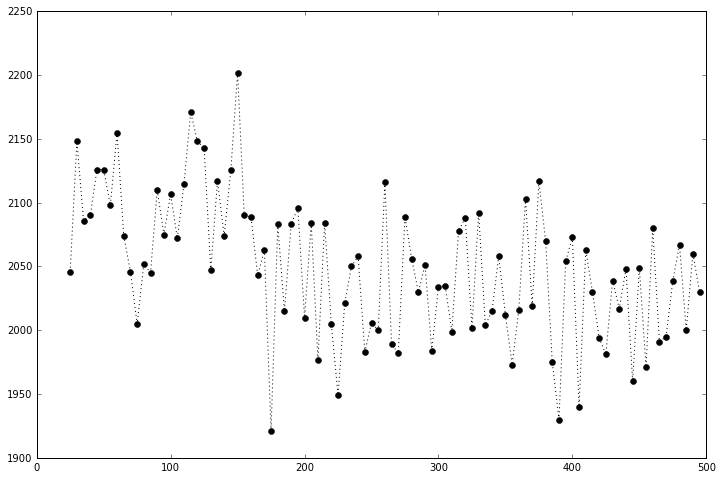

In [10]:
def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,0]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\9-30-16\MNP 3 on CPW 5mW scan 8 x183 y100 B0.5V T90 3 rabi *[4]',
              r'C:\Users\Ouyang Group\Documents\Data\9-30-16\MNP 3 on CPW 5mW scan 8 x183 y100 B0.5V T90 3 rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
#opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
#plt.plot(t,RabiFit(t,*opt0),'b-')
#print opt0

Phi: 156.983699 +/- 0.596036
Theta: 43.966597 or +/- 0.448434
Phi(naive): 148.652000
Theta(naive): 47.719847


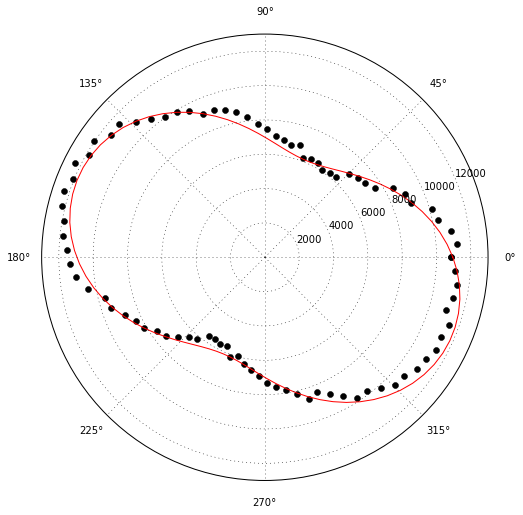

In [11]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\9-30-16\MNP 3 on CPW 0.5mW scan 8 x183 y100 rotor sweep 2')
T1[:,1] -= 1560
OrientPol(T1,False)

In [15]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh import palettes
output_notebook()
TOOLS = "box_zoom,box_select,crosshair,hover,resize,reset"
import pandas as pd

Loading BokehJS ...

In [21]:
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\9-30-16\MNP 3 on CPW 5mW scan 8 x183 y100 T-31 d6.2 th47 ODMR -9dbm sweep 1 *V.txt')
output_file("10-1-16 Dot 1 ODMR 2.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::3]
Bs = np.linspace(0,2.5,len(files))*(11/0.5)
p = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[4,0],bsweep[-2,0]],tools=TOOLS)
p.image(image=[diffs],x=Bs[0], y=bsweep[4,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[4,0]], palette='RdPu9')
p.line(Bs,2.864E9+28E6*Bs,line_dash=(6,6),line_color='black')
p.line(Bs,2.864E9-28E6*Bs,line_dash=(6,6),line_color='black')
show(p)

[  2.24282817e+01   1.12846515e-01   2.05112328e+02   7.25669652e+00
   1.00001712e+04]


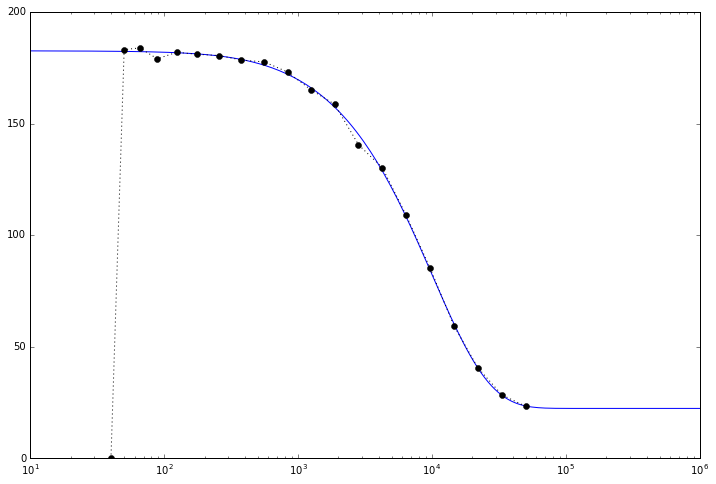

In [19]:
def T1Fit(t,I_inf,C_m,T_m,C_1,T_1):
         return I_inf * (1 - C_m*np.exp(-t/T_m) + C_1*np.exp(-t/T_1))
    
time,T0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\9-30-16\MNP 3 on CPW 5mW scan 8 x183 y100 T-31 d6.2 th47 T1 *[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\9-30-16\MNP 3 on CPW 5mW scan 8 x183 y100 T-31 d6.2 th47 T1 Pulse Seq')
time = time+20
T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')